# Elliptical Slice Sampling
The purpose of this notebook is to check if the `elliptic.py` file implementing Elliptical Slice Sampling works as expected, whilst demonstrating how it can be used to sample from the latent variable posterior $p(\mathbf{f} | \mathbf{y}, \boldsymbol{\theta})$.

In [1]:
import numpy as np

from matplotlib import pyplot as plt

from gproc.elliptic import ess_samples_probit
from gproc.generative import sample_at_x
from gproc.kernels import squared_exponential
from gproc.kernels import rational_quadratic
from gproc.kernels import periodic

## Data Generation

In [2]:
N = 500 # Data size
D = 1 # Data dimension

x = np.random.uniform(-1, 1, N * D).reshape(-1, D) # Reshape to N x D matrix
y, prob_y, f = sample_at_x(x, kernel_fcn=periodic, kernel_params = {'lengthscale': 1, 'variance': 1.4, 'period':2})

## Generate Latent Posterior Samples

In [3]:
model_lengthscale=0.1
model_variance=1.4
#K = squared_exponential(x, x, lengthscale=model_lengthscale, variance=model_variance)
#K = rational_quadratic(x, x, lengthscale=0.1, variance=1.4, weighting=1)
K = periodic(x, x, lengthscale=1, variance=1.4, period=2)
K_chol = np.linalg.cholesky(K + 0.0001*np.eye(K.shape[0]))
samples = ess_samples_probit(K_chol, y, 2500, 500)

~~~Sample 100 out of 3000~~~
~~~Sample 200 out of 3000~~~
~~~Sample 300 out of 3000~~~
~~~Sample 400 out of 3000~~~
~~~Sample 500 out of 3000~~~
~~~Sample 600 out of 3000~~~
~~~Sample 700 out of 3000~~~
~~~Sample 800 out of 3000~~~
~~~Sample 900 out of 3000~~~
~~~Sample 1000 out of 3000~~~
~~~Sample 1100 out of 3000~~~
~~~Sample 1200 out of 3000~~~
~~~Sample 1300 out of 3000~~~
~~~Sample 1400 out of 3000~~~
~~~Sample 1500 out of 3000~~~
~~~Sample 1600 out of 3000~~~
~~~Sample 1700 out of 3000~~~
~~~Sample 1800 out of 3000~~~
~~~Sample 1900 out of 3000~~~
~~~Sample 2000 out of 3000~~~
~~~Sample 2100 out of 3000~~~
~~~Sample 2200 out of 3000~~~
~~~Sample 2300 out of 3000~~~
~~~Sample 2400 out of 3000~~~
~~~Sample 2500 out of 3000~~~
~~~Sample 2600 out of 3000~~~
~~~Sample 2700 out of 3000~~~
~~~Sample 2800 out of 3000~~~
~~~Sample 2900 out of 3000~~~


## Mean of Samples Against True Function and Laplace

### ESS Samples Mean

In [4]:
ess_mean = np.mean(samples, axis=0)

### Laplace Approximation

In [5]:
from gproc.laplace import laplace_approximation_probit, chol_inverse

laplace_mean, df_ll, laplace_cov, objective_history, converged = laplace_approximation_probit(y, chol_inverse(K))

## Plot Means

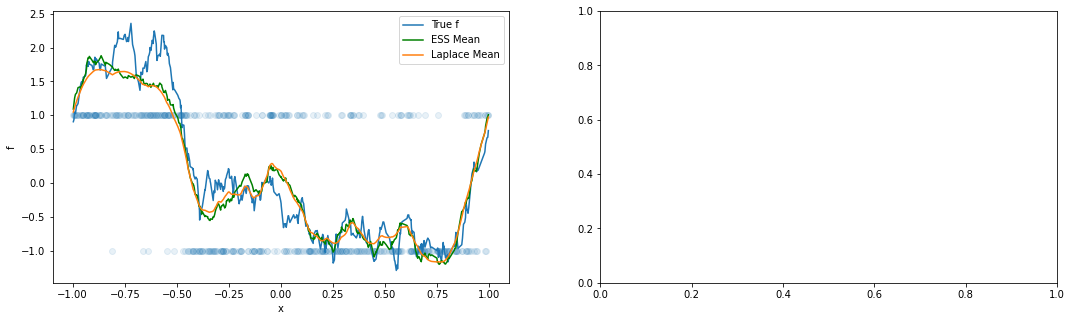

In [6]:
sort_ix = np.argsort(x.reshape(-1))

fig, axarr = plt.subplots(1, 2, figsize=(18, 5), gridspec_kw={'width_ratios': [1,1]})

axarr[0].scatter(x, y, alpha=0.1)
axarr[0].set_xlabel('x')
axarr[0].set_ylabel('f')
axarr[0].plot(x[sort_ix], f[sort_ix], label='True f')
axarr[0].plot(x[sort_ix], ess_mean[sort_ix], c='g', label='ESS Mean')
axarr[0].plot(x[sort_ix], laplace_mean[sort_ix], label='Laplace Mean')

axarr[0].legend()

(array([  1.,   0.,   4.,   2.,   2.,   2.,   5.,  11.,  14.,  25.,  37.,
         55.,  59.,  73.,  87.,  98., 134., 139., 138., 114.,  99., 112.,
        114., 119., 128., 115., 102., 127., 108.,  70.,  60.,  65.,  55.,
         47.,  38.,  35.,  30.,  27.,   9.,  14.,   7.,   5.,   7.,   3.,
          2.,   0.,   0.,   0.,   1.,   1.]),
 array([0.59443775, 0.6322708 , 0.67010385, 0.7079369 , 0.74576995,
        0.783603  , 0.82143605, 0.8592691 , 0.89710215, 0.9349352 ,
        0.97276825, 1.0106013 , 1.04843435, 1.0862674 , 1.12410045,
        1.1619335 , 1.19976655, 1.2375996 , 1.27543265, 1.3132657 ,
        1.35109875, 1.3889318 , 1.42676485, 1.4645979 , 1.50243095,
        1.540264  , 1.57809705, 1.6159301 , 1.65376315, 1.6915962 ,
        1.72942925, 1.7672623 , 1.80509534, 1.84292839, 1.88076144,
        1.91859449, 1.95642754, 1.99426059, 2.03209364, 2.06992669,
        2.10775974, 2.14559279, 2.18342584, 2.22125889, 2.25909194,
        2.29692499, 2.33475804, 2.37259109, 2.

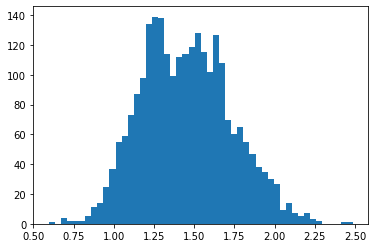

In [7]:
plt.hist(samples[:,0], bins=50)